# Lesson2 畳み込みニューラルネットワーク (CNN)

## Homework

今Lessonで学んだことに工夫を加えて, CNNでより高精度なCIFAR10の分類器を実装してみましょう.
精度上位者はリーダーボードに載ります.

### 目標値

Accuracy 90%

### ルール

- ネットワークの形などは特に制限を設けません.
- アンサンブル学習などを組み込んでもOKです.
- **下のセルで指定されている`x_train`, `y_train`以外の学習データは使わないでください.**

### 評価について

- テストデータ(`x_test`)に対する予測ラベルをcsvファイルで提出してください.
- ファイル名は`submission.csv`としてください.
- 予測ラベルの`y_test`に対する精度 (Accuracy) で評価します.
- 毎日24時にテストデータの一部に対する精度でLeader Boardを更新します.
- 最終的な評価はテストデータ全体に対する精度でおこないます.

### サンプルコード

**次のセルで指定されている`x_train`, `y_train`のみを使って学習させてください.**

In [1]:
import numpy as np
import pandas as pd

def load_cifar10():
    
    # 学習データ
    x_train = np.load('/root/userspace/public/lesson2/data/x_train.npy')
    y_train = np.load('/root/userspace/public/lesson2/data/y_train.npy')

    # テストデータ
    x_test = np.load('/root/userspace/public/lesson2/data/x_test.npy')
    
    x_train = x_train / 255.
    x_test = x_test / 255.
    
    y_train = np.eye(10)[y_train]
    
    return (x_train, x_test, y_train)

x_train, x_test, y_train = load_cifar10()

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


In [3]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

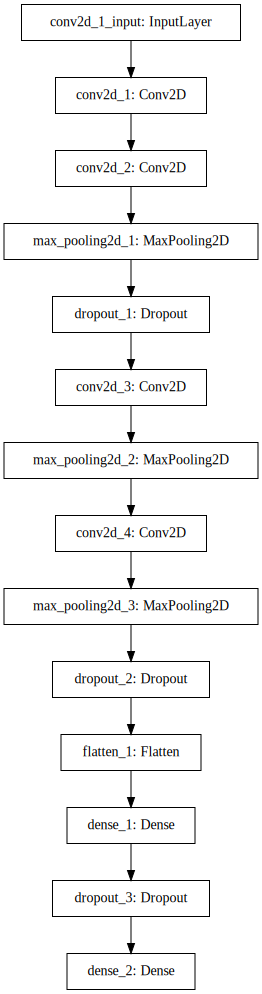

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.2,  # 3.1.1 左右にずらす
    height_shift_range=0.2,  # 3.1.2 上下にずらす
    horizontal_flip=True,  # 3.1.3 左右反転
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, patience=3)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=500),
                    steps_per_epoch=x_train.shape[0] // 500, epochs=250,  callbacks=[early_stopping])

Epoch 1/250
100/100 [==============================] - 22s 224ms/step - loss: 2.1821 - acc: 0.1765
Epoch 2/250


/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:494: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: acc,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 19s 193ms/step - loss: 1.9522 - acc: 0.2715
Epoch 3/250
100/100 [==============================] - 19s 193ms/step - loss: 1.8380 - acc: 0.3107
Epoch 4/250
100/100 [==============================] - 19s 193ms/step - loss: 1.7648 - acc: 0.3405
Epoch 5/250
100/100 [==============================] - 19s 193ms/step - loss: 1.7079 - acc: 0.3606
Epoch 6/250
100/100 [==============================] - 19s 194ms/step - loss: 1.6685 - acc: 0.3797
Epoch 7/250
100/100 [==============================] - 19s 193ms/step - loss: 1.6307 - acc: 0.3956
Epoch 8/250
100/100 [==============================] - 19s 194ms/step - loss: 1.6033 - acc: 0.4090
Epoch 9/250
100/100 [==============================] - 19s 193ms/step - loss: 1.5726 - acc: 0.4210
Epoch 10/250
100/100 [==============================] - 19s 194ms/step - loss: 1.5522 - acc: 0.4282
Epoch 11/250
100/100 [==============================] - 19s 194ms/step - loss: 1.5270 - acc: 0.4395
Epoch 12/250
100/100

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, 1)

In [ ]:
submission = pd.Series(y_pred, name='label')
submission.to_csv('/root/userspace/lesson2/blank/submission.csv', header=True, index_label='id')